In [40]:
def gen_oracle(n):
    print("oracle bool f(bool x[%d]) {" % (n))
    print("    bool res = " + " && ".join(["x[%d]" % (i) for i in range(n)]) + ";")
    print("    return res;\n}")
    
    print("f(" + ", ".join(["q[%d]" % (i) for i in range(n)]) + ", res);")
    print("oracle f(%d, 1) = [" % (n) + ",".join(["0" for i in range(2**n - 1)]) + ",1];")
    print("nctrl<%d> X(" % (n + 1) + ", ".join(["q[%d]" % (i) for i in range(n)]) + ", res, anc);")
    
gen_oracle(8)

oracle bool f(bool x[8]) {
    bool res = x[0] && x[1] && x[2] && x[3] && x[4] && x[5] && x[6] && x[7];
    return res;
}
f(q[0], q[1], q[2], q[3], q[4], q[5], q[6], q[7], res);
oracle f(8, 1) = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1];
nctrl<9> X(q[0], q[1], q[2], q[3], q[4], q[5], q[6], q[7], res, anc);


[pyqsp.poly.PolySign] degree=29, delta=99999
[PolyTaylorSeries] max [0.89996344] is at [1.]: normalizing
[PolyTaylorSeries] average error = 0.13527428287725207 in the domain [-1, 1] using degree 29


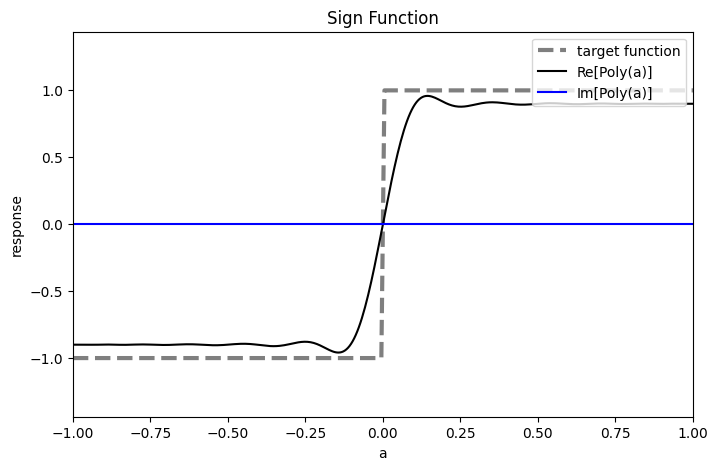

29
[44.45398335410345, -2.4433564705095137, -1.9725578364831746, -0.9239624681369571, -0.924514164920628, -1.3458800092804224, -1.492733619189183, -1.0381974226169999, -4.067252920170617, -1.222365482546138, 0.7297860105901366, -2.202560709737147, -2.105858586937069, -1.00048894567435, -2.442629405589156, -2.4426294055886566, -1.0004889456755377, -2.1058585869391857, 0.9390319438530796, -2.4118066429974836, -1.222365482544803, -4.0672529201687455, -1.0381974226147295, -1.4927336191863814, -1.3458800092790009, -0.9245141649222272, -0.923962468140086, -1.9725578364865815, -2.4433564705125552]


In [39]:
import pyqsp
import numpy as np
from pyqsp import angle_sequence, response

# 1806.01838 Definition 7 and Corollary 8
def Wx_to_Rx(phi):
    d = len(phi) - 1
    res = [phi[0] + phi[d] + (d - 1) * np.pi / 2]
    res = res + [phi[i] - np.pi / 2 for i in range(1, d)]
    return res

pg = pyqsp.poly.PolySign()
pcoefs = pg.generate(degree = 29, delta = 99999)
phi = angle_sequence.QuantumSignalProcessingPhases(pcoefs, signal_operator="Wx")
response.PlotQSPResponse(
    phi,
    target=lambda x: np.sign(x),
    signal_operator="Wx",
    title="Sign Function")

phi = Wx_to_Rx(phi)
print(len(phi))
print(phi)
